# Muon Rate Studies:


## Code

In [11]:
import matplotlib.dates as mdates

ms2min = 1.6666666666666667*10**(-8)
fidelity = 15*ms2min

def getMuonRate(mdfo, mu_num_thresh_hold,pdf=False,save=False):
    ms2min = 1.6666666666666667*10**(-8)
    times = mdfo.get("time")*ms2min
    mu_num = mdfo.get("event_num")
    dates = [i.split(" ")[0] for i in mdfo.get("event_time")]
    dates = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
    colors = ['red' if x == "day" else 'blue' for x in mdfo.get("time_of_day")]
    time_arr = []
    color = []
    date_str = []
    
    for i in range(len(mu_num)):
        if mu_num[i] % mu_num_thresh_hold == 0:
            time_arr.append(times[i])
            color.append(colors[i])
            date_str.append(dates[i])

    time_diff = np.diff(np.array(time_arr))
    mu_rate = np.array(mu_num_thresh_hold / time_diff)
    xvals = np.array([i for i in range(len(mu_rate))])
        
    day = np.array(color) == "red"
    night = np.array(color) == "blue"

    fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(15,20))
    plt.suptitle("Muon Rate (number/min)\n",fontsize = 15)
    ax0, ax1, ax2, ax3 = axes.flatten()
    
    date_str = np.array(date_str)    
    dates_day = date_str[day[:]][1:]
    dates_night = date_str[night[:]]
    
    dates_day = mdates.date2num(dates_day)    # Convert to maplotlib format
    dates_night = mdates.date2num(dates_night) 
    hfmt = mdates.DateFormatter('%d\n%m')
    ax0.scatter(dates_day, mu_rate[day[1:]], color='orange', label="day")
    ax0.legend()
    ax0.set_xlabel("Date")
    ax0.set_ylabel("Muon Rate")
    ax0.set_ylim([160,210])
    ax0.xaxis.set_major_formatter(hfmt)
    ax0.tick_params(labelbottom=True)
    
    ax1.scatter(dates_night, mu_rate[night[1:]],color='blue', label="night")
    ax1.legend()
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Muon Rate")
    ax1.set_ylim([160,210])
    ax1.xaxis.set_major_formatter(hfmt)
    ax1.tick_params(labelbottom=True)
    
    ax2.scatter(xvals[day[1:]], mu_rate[day[1:]],color='orange', label="day")
    ax2.scatter(xvals[night[1:]], mu_rate[night[1:]],color='blue', label="night")
    ax2.legend()
    ax2.set_xlabel("Number of Muon Events (per 1000)")
    ax2.set_ylabel("Muon Rate")
    ax2.set_ylim([160,210])
    
    
    ax3.hist(mu_rate[night[1:]],label="night",histtype="step",bins=15)
    ax3.hist(mu_rate[day[1:]],label="day",histtype="step",bins=15)
    ax3.set_xlabel("Muon Rate")
    plt.legend()
    
    strun = mdfo.get("Run_Num")[0]
    endrun = mdfo.get("Run_Num")[-1]
    fig.tight_layout()
    if not pdf:
        if save:
            plt.savefig("muon_rate_{}_{}.png".format(strun,endrun))
        plt.show()
    else:
        return fig

## Mystery Config

In [1]:
from MuDataFrame import *
import copy

r1,r2 = 470, 484
r3, r4 = 513,514
path = "processed_data/run{}.csv"
lead_files = [path.format(i) for i in range(r1,r2+1)] + [path.format(i) for i in range(r3,r4+1)]

mdfo_c = [] #collection of objects

for file in lead_files:
    mdfo_c.append(MuDataFrame(file)) #Muon Data Frame Object for Lead

mdf_list = [i.events_df for i in mdfo_c]
mdf_lead = mdfo_c[0].getMergedMDF(mdf_list)

mdfo_lead = copy.copy(mdfo_c[0])
mdfo_lead.events_df = mdf_lead

mdfo_lead.longDataMode()



mdf_lead = mdfo_lead.events_df
mdfo_lead.og_df = mdf_lead.copy()
mdfo_lead.show()

,index,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,r1hit,r2hit,...,z_angle,SmallCounter,speed,Run_Num,xx,yy,xx1,yy1,time_of_day,time
0,0,0,2021-03-06 15:02:04.261026,0,1.0,1.0,1.0,1.0,1.0,1.0,...,12.094639,NaN,0.432981,470,3.127148,-13.531746,2.800000,-12.830769,day,0
1,1,1,2021-03-06 15:02:04.471190,0,0.0,1.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,470,NaN,NaN,NaN,NaN,day,210164
2,2,2,2021-03-06 15:02:04.769835,0,1.0,1.0,1.0,1.0,1.0,1.0,...,10.115495,NaN,0.260033,470,8.708801,-14.698315,8.269231,-15.653846,day,508809
3,3,3,2021-03-06 15:02:05.000722,0,1.0,0.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,470,6.293532,NaN,5.838462,NaN,day,739696
4,4,4,2021-03-06 15:02:05.271081,0,1.0,1.0,1.0,1.0,1.0,1.0,...,11.696716,NaN,0.488741,470,11.831276,31.368313,13.269231,34.961538,day,1010055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699995,99995,1699995,2021-03-15 10:54:58.051140,0,1.0,1.0,1.0,1.0,1.0,1.0,...,18.567715,NaN,0.387068,514,-29.605425,-25.301969,-30.961538,-25.769231,day,552197790114
1699996,99996,1699996,2021-03-15 10:54:58.441498,0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.748911,NaN,0.442530,514,3.665116,-7.970331,3.346154,-8.130769,day,552198180472
1699997,99997,1699997,2021-03-15 10:54:59.071271,0,1.0,1.0,1.0,0.0,1.0,1.0,...,NaN,NaN,NaN,514,-4.285714,NaN,-3.876923,NaN,day,552198810245
1699998,99998,1699998,2021-03-15 10:54:59.371259,0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.869603,NaN,3.688543,514,-27.748858,-20.165877,-28.269231,-19.638462,day,552199110233


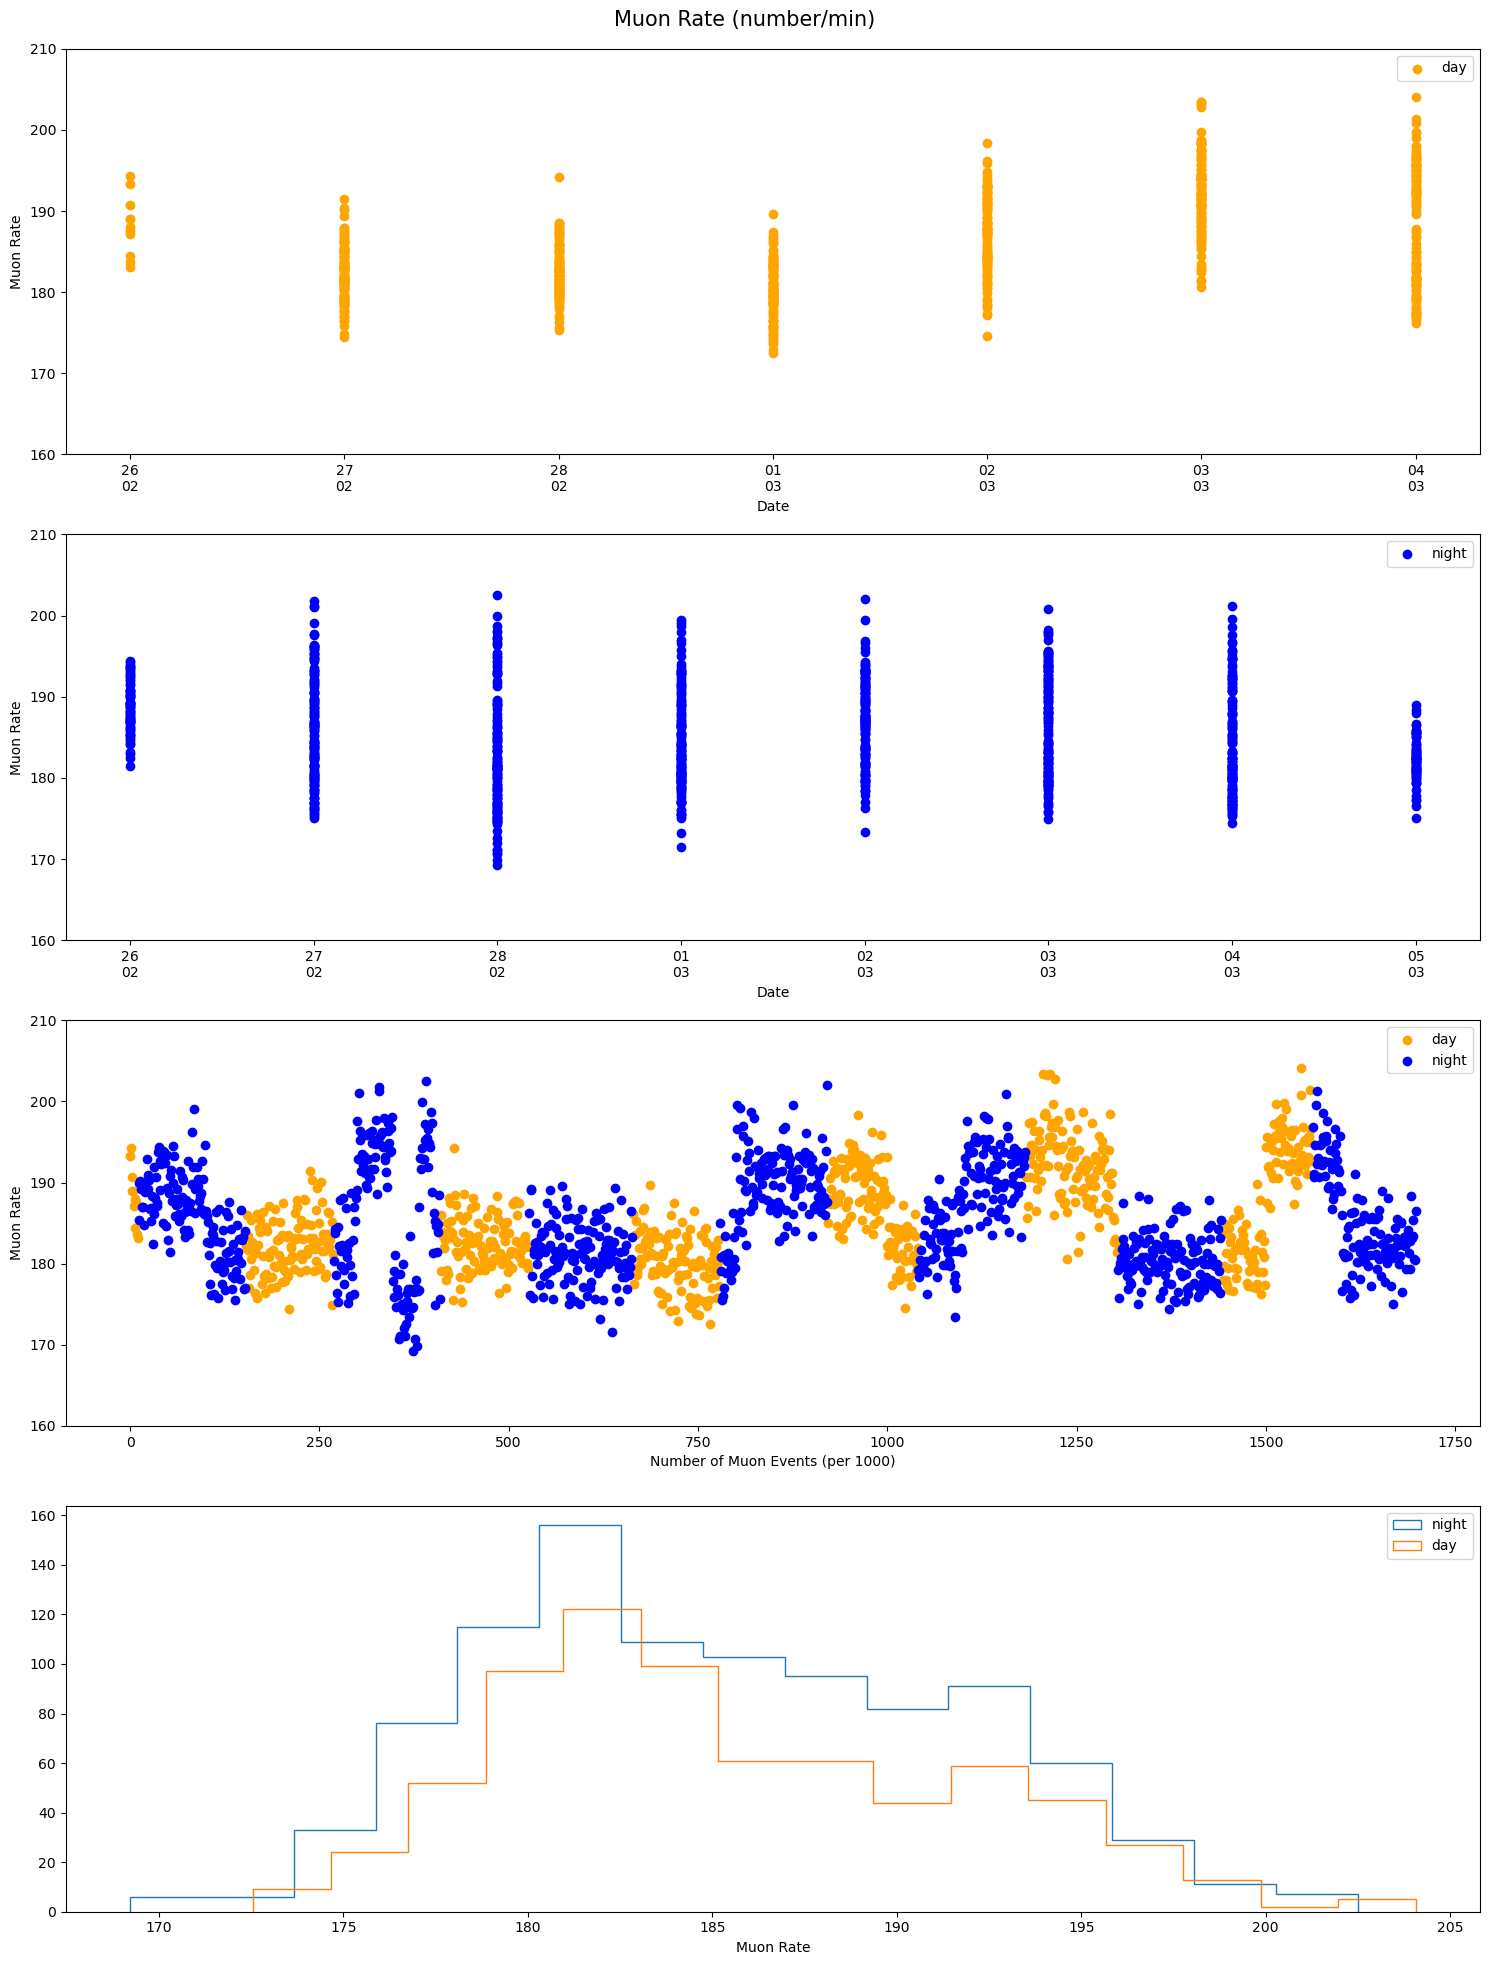

In [17]:
mdfo_lead.reload()    
getMuonRate(mdfo_lead,1000)

##  Lead Bricks (No Gap)

In [13]:
from MuDataFrame import *
import glob
import copy

path = "/Volumes/mac_extended/Research/MT/proto1b/data_sets/lead_brick_experiment_final/single_files/lead_bricks/"

files = []
for i in glob.glob(path+"run*"):
    files.append(i)
    
mdfo_c = [] #collection of objects

for file in files:
    mdfo_c.append(MuDataFrame(file)) #Muon Data Frame Object for Lead

mdf_list = [i.events_df for i in mdfo_c]
mdf_calib = mdfo_c[0].getMergedMDF(mdf_list)

mdfo_calib = copy.copy(mdfo_c[0])
mdfo_calib.events_df = mdf_calib

mdfo_calib.longDataMode()


mdf_calib = mdfo_calib.events_df
mdfo_calib.og_df = mdf_calib.copy()
mdfo_calib.show()

,index,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,r1hit,r2hit,...,theta_y2,z_angle,SmallCounter,Run_Num,xx,yy,xx1,yy1,time_of_day,time
0,0,0,2021-02-13 17:51:53.043620,0,1,0,1,1,0,0,...,-268.760653,NaN,NaN,410,NaN,NaN,NaN,NaN,day,0
1,1,1,2021-02-13 17:51:53.553858,0,1,1,1,0,1,1,...,NaN,NaN,NaN,410,14.764119,NaN,16.930769,NaN,day,510238
2,2,2,2021-02-13 17:51:53.723748,0,1,1,1,1,1,1,...,-0.000000,12.929503,NaN,410,-18.990826,-14.251543,-19.107692,-13.692308,day,680128
3,3,3,2021-02-13 17:51:54.233733,0,1,1,1,0,1,1,...,NaN,NaN,NaN,410,-13.148333,NaN,-12.630769,NaN,day,1190113
4,4,4,2021-02-13 17:51:54.544048,0,1,1,1,1,1,1,...,-355.758108,10.370192,NaN,410,6.296684,0.842881,6.823077,0.769231,day,1500428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299995,99995,1299995,2021-02-18 16:25:02.008619,0,1,1,1,1,1,1,...,-3343.503246,16.958188,NaN,422,-37.292360,14.723278,-40.000000,16.030769,day,415072964999
1299996,99996,1299996,2021-02-18 16:25:02.178508,0,1,1,1,1,1,1,...,-79.833930,2.626992,NaN,422,-12.687742,19.308536,-14.361538,21.069231,day,415073134888
1299997,99997,1299997,2021-02-18 16:25:02.608635,0,1,1,1,1,0,0,...,0.000000,NaN,NaN,422,NaN,NaN,NaN,NaN,day,415073565015
1299998,99998,1299998,2021-02-18 16:25:02.718867,0,1,1,1,0,1,1,...,NaN,NaN,NaN,422,-2.350427,NaN,-2.492308,NaN,day,415073675247


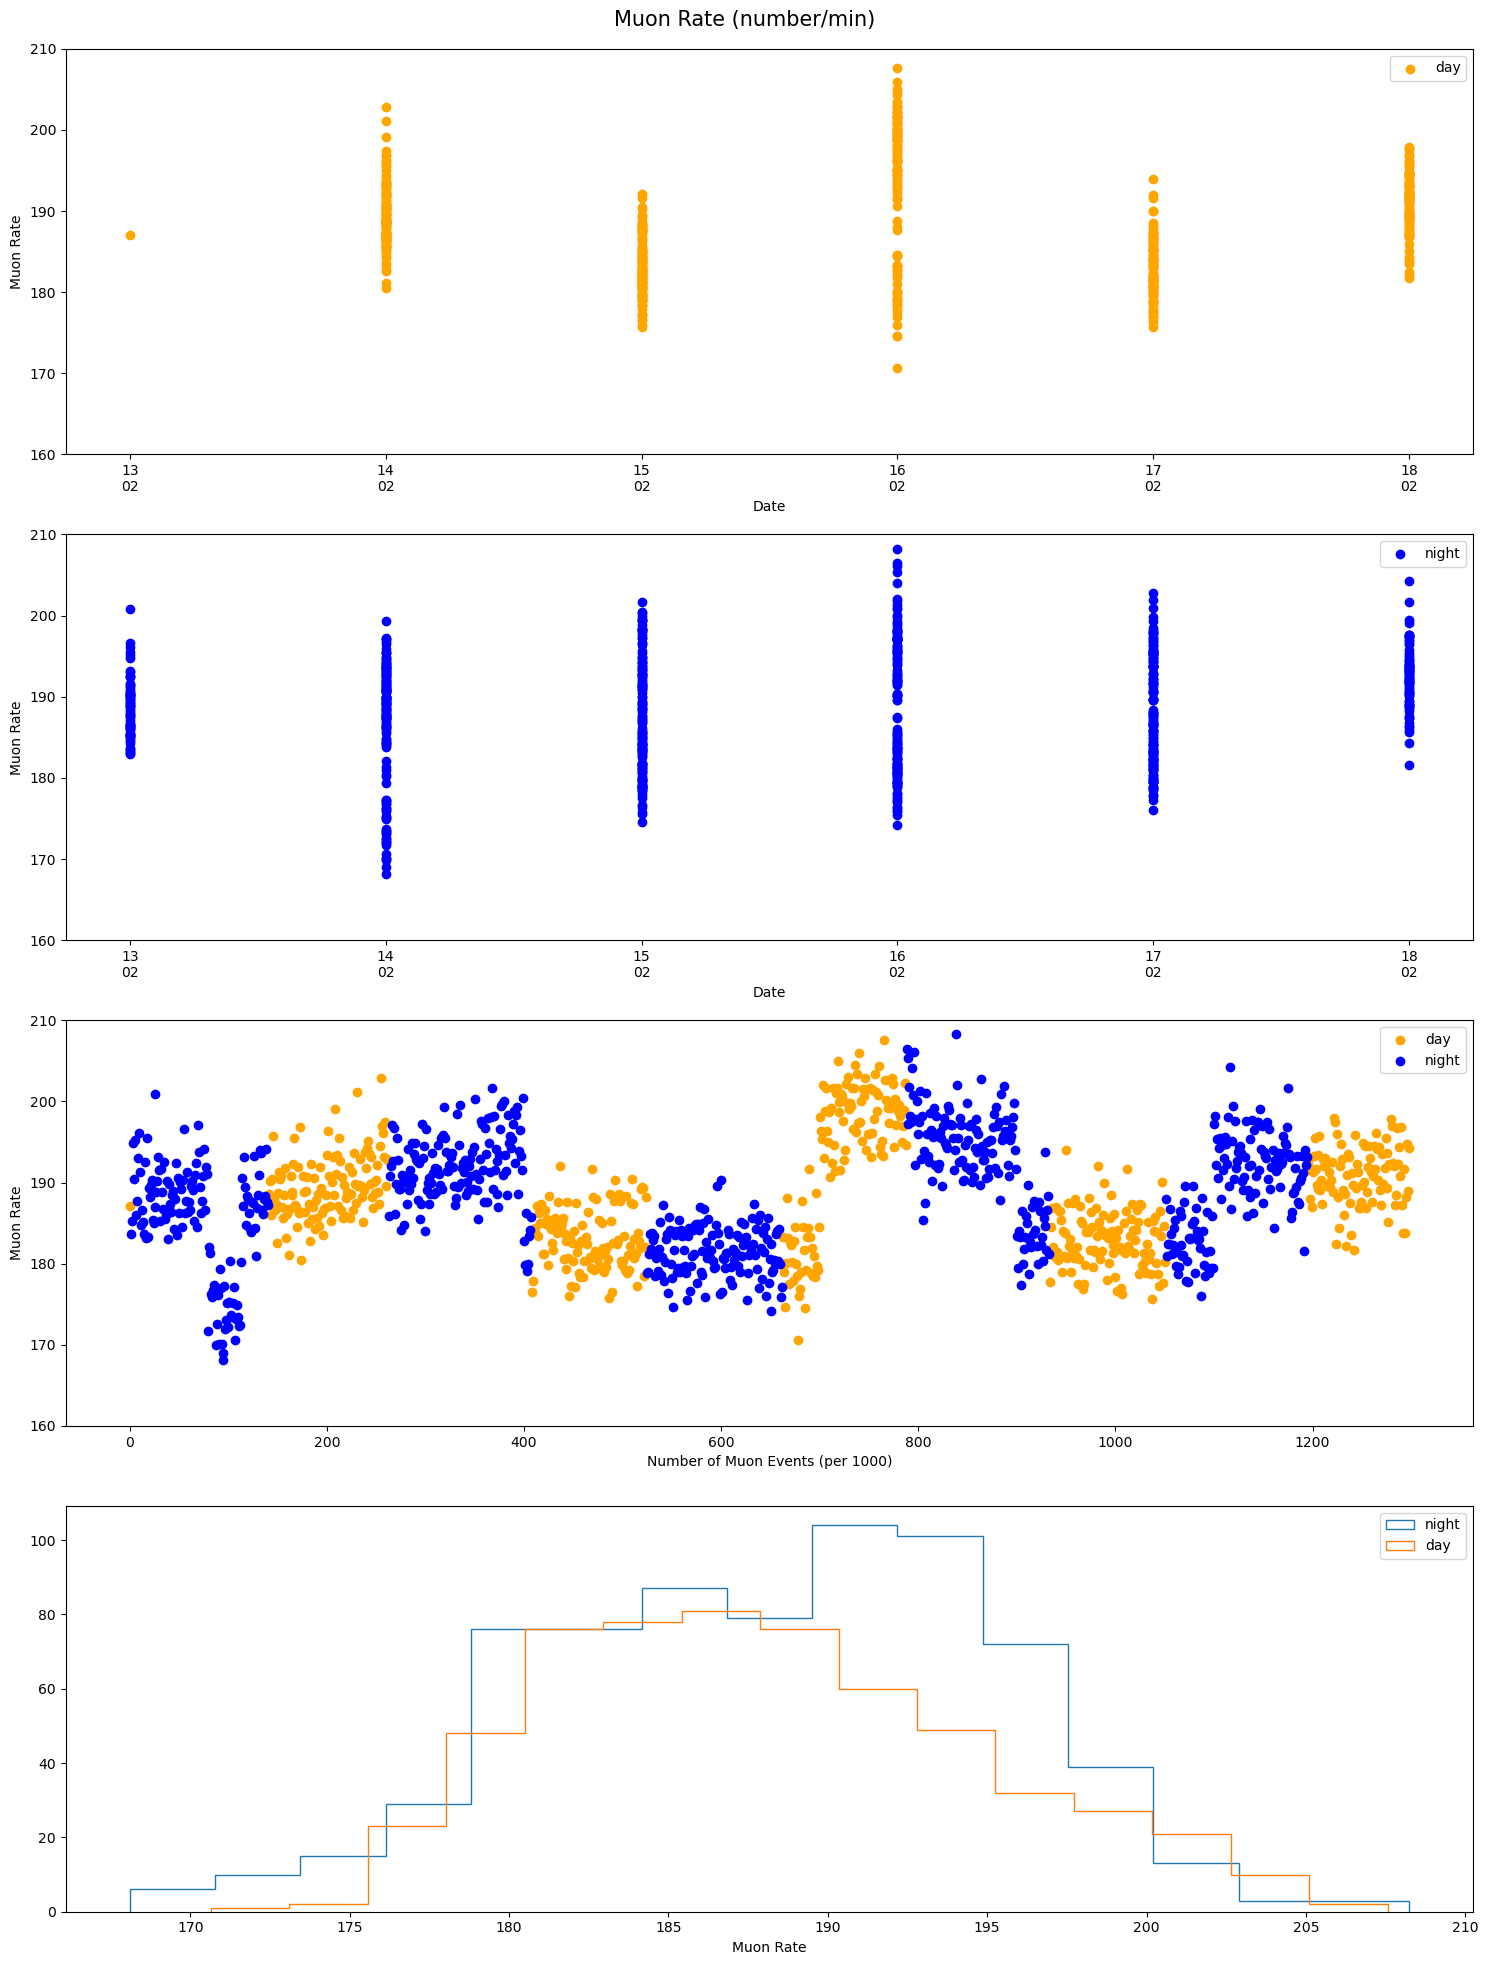

In [14]:
mdfo_calib.reload()    
getMuonRate(mdfo_calib,1000,save=True)

## Lead Bricks With Gap

In [15]:
from MuDataFrame import *
import copy

r1,r2 = 448, 464
path = "/Volumes/mac_extended/Research/MT/proto1b/data_sets/lead_brick_with_gap/run{}.csv"
lead_files = [path.format(i) for i in range(r1,r2+1)]

mdfo_c = [] #collection of objects

for file in lead_files:
    mdfo_c.append(MuDataFrame(file)) #Muon Data Frame Object for Lead

mdf_list = [i.events_df for i in mdfo_c]
mdf_lead = mdfo_c[0].getMergedMDF(mdf_list)

mdfo_lead = copy.copy(mdfo_c[0])
mdfo_lead.events_df = mdf_lead

mdfo_lead.longDataMode()

mdf_lead = mdfo_lead.events_df
mdfo_lead.og_df = mdf_lead.copy()
mdfo_lead.show()

,index,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,r1hit,r2hit,...,z_angle,SmallCounter,speed,Run_Num,xx,yy,xx1,yy1,time_of_day,time
0,0,0,2021-02-26 16:55:07.855717,0,1.0,1.0,1.0,1.0,1.0,1.0,...,13.002545,NaN,0.706080,448,-13.835939,-23.477356,-15.761538,-23.861538,day,0
1,1,1,2021-02-26 16:55:08.306029,0,1.0,1.0,1.0,0.0,1.0,1.0,...,NaN,NaN,NaN,448,-12.727052,NaN,-14.107692,NaN,day,450312
2,2,2,2021-02-26 16:55:08.595966,0,1.0,1.0,1.0,1.0,1.0,1.0,...,7.348492,NaN,1.233197,448,8.156373,-25.953945,9.392308,-26.961538,day,740249
3,3,3,2021-02-26 16:55:08.706069,0,1.0,1.0,1.0,1.0,1.0,1.0,...,15.489461,NaN,0.278597,448,-29.570042,26.198890,-32.153846,28.500000,day,850352
4,4,4,2021-02-26 16:55:09.336426,0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.921821,NaN,0.612330,448,14.777760,11.212104,16.415385,13.192308,day,1480709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699995,99995,1699995,2021-03-05 06:43:05.575028,0,1.0,1.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,464,NaN,NaN,NaN,NaN,night,550961719311
1699996,99996,1699996,2021-03-05 06:43:06.125107,0,1.0,1.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,464,NaN,NaN,NaN,NaN,night,550962269390
1699997,99997,1699997,2021-03-05 06:43:06.515085,0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,464,NaN,NaN,NaN,NaN,night,550962659368
1699998,99998,1699998,2021-03-05 06:43:06.705122,0,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,464,15.294147,NaN,15.084615,NaN,night,550962849405


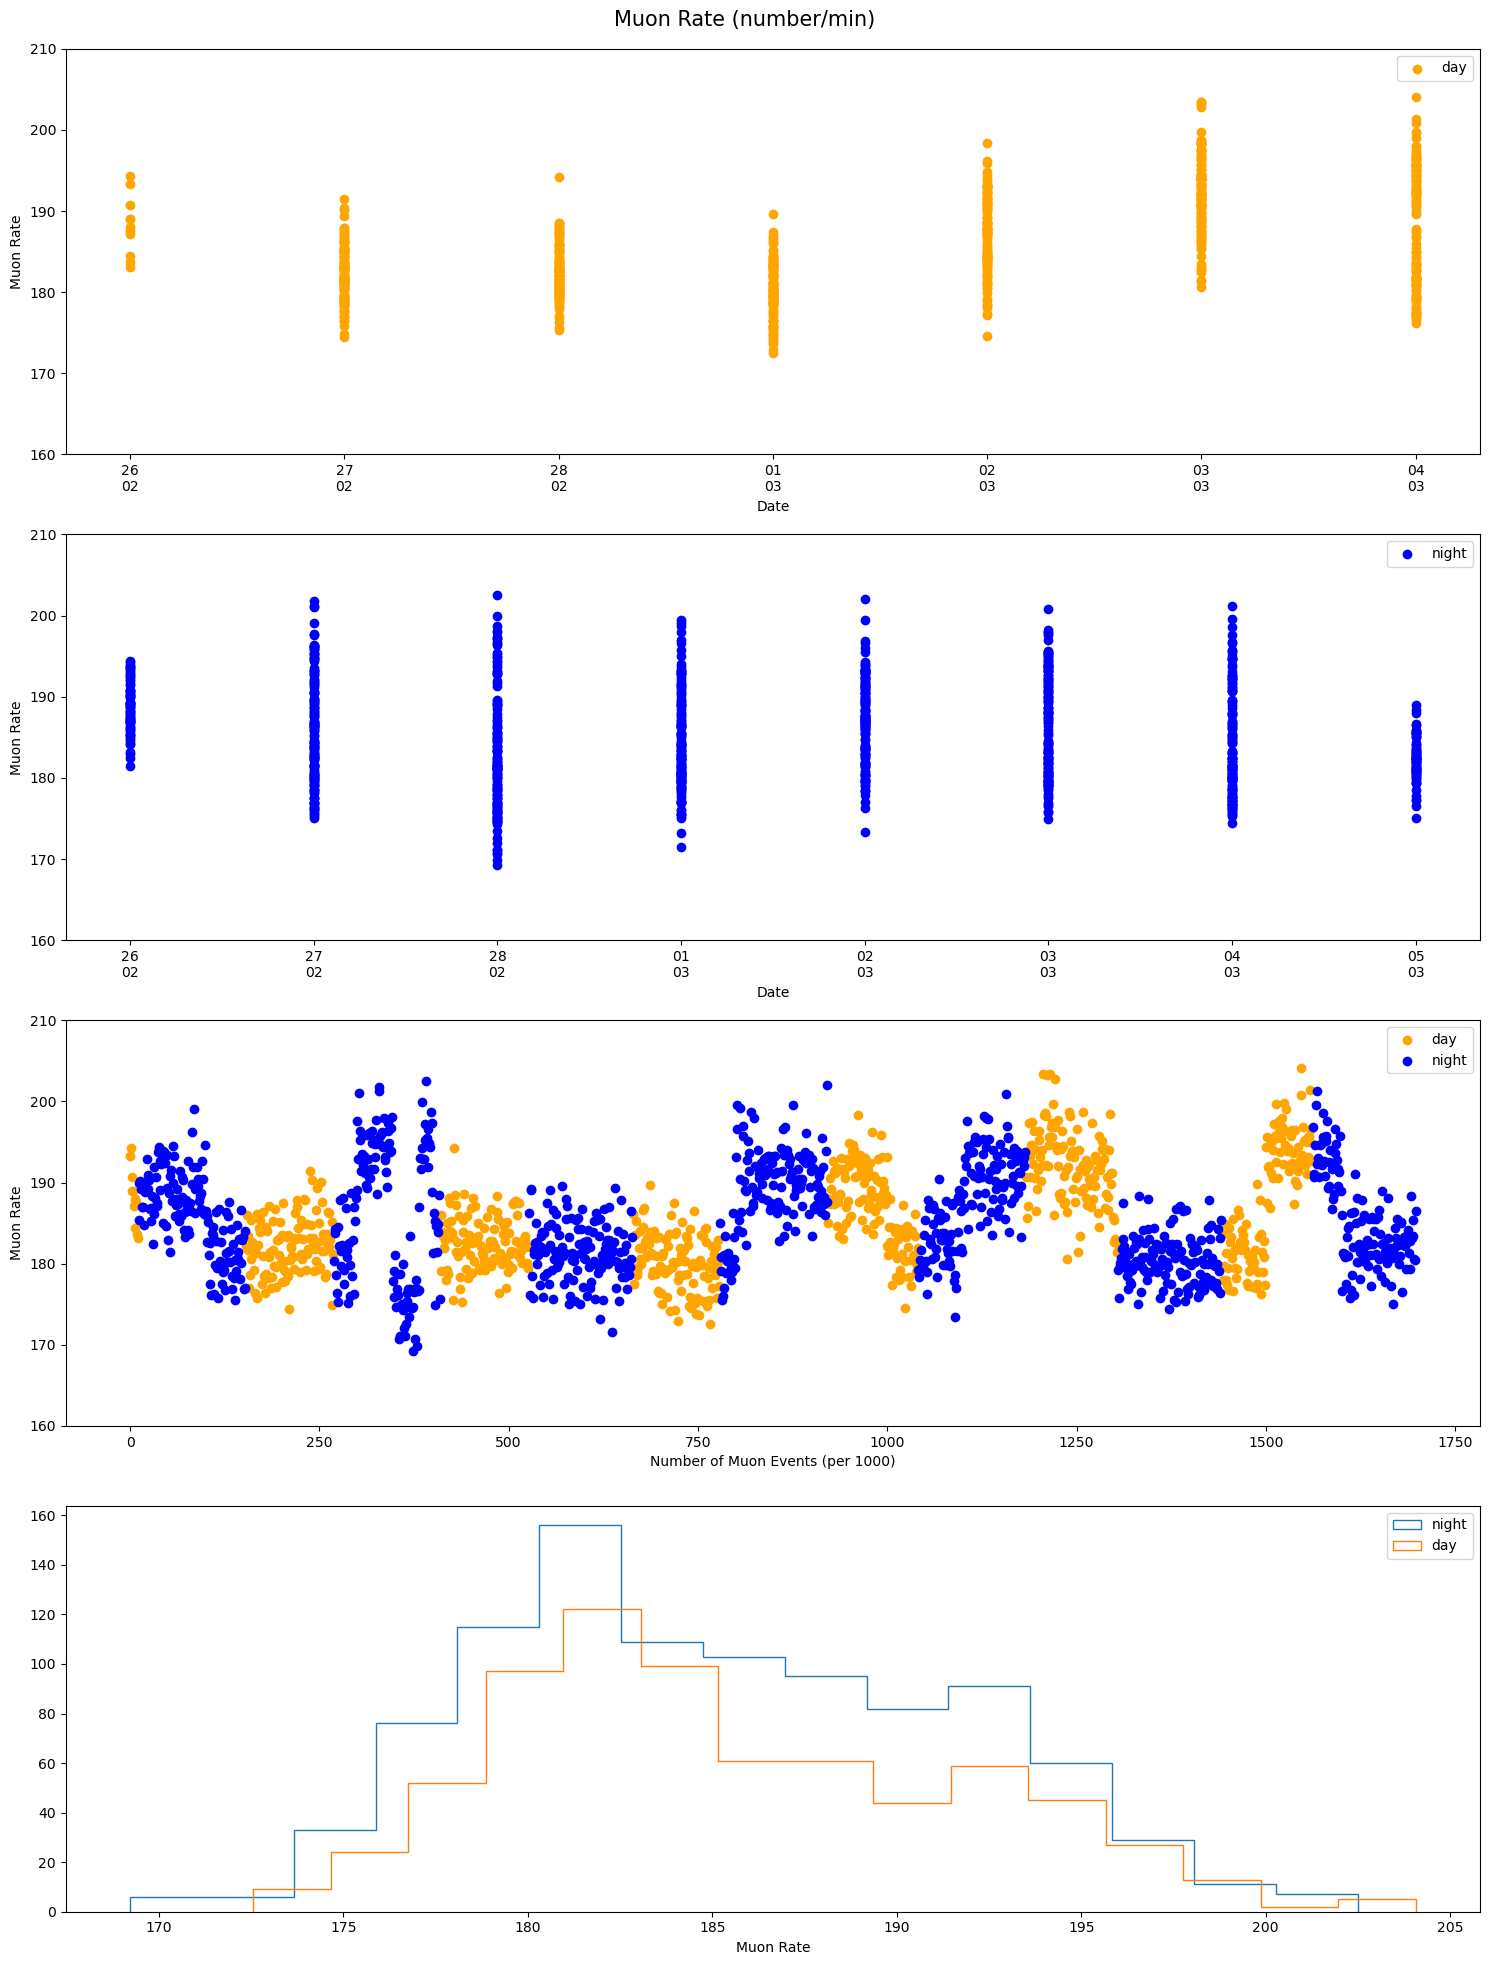

In [19]:
mdfo_lead.reload()    
getMuonRate(mdfo_lead,1000,save=True)

## Calibration Data

In [7]:
from MuDataFrame import *
import glob
import copy

path = "/Volumes/mac_extended/Research/MT/proto1b/data_sets/calibration_data/"

files = []
for i in glob.glob(path+"run*"):
    files.append(i)
    
mdfo_c = [] #collection of objects

for file in files:
    mdfo_c.append(MuDataFrame(file)) #Muon Data Frame Object for Lead

mdf_list = [i.events_df for i in mdfo_c]
mdf_calib = mdfo_c[0].getMergedMDF(mdf_list)

mdfo_calib = copy.copy(mdfo_c[0])
mdfo_calib.events_df = mdf_calib

mdfo_calib.longDataMode()


mdf_calib = mdfo_calib.events_df
mdfo_calib.og_df = mdf_calib.copy()
mdfo_calib.show()

,index,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,r1hit,r2hit,...,z_angle,SmallCounter,Run_Num,speed,xx,yy,xx1,yy1,time_of_day,time
0,0,0,2021-02-12 17:28:56.139954,0,1.0,1.0,1.0,1.0,1.0,1.0,...,12.743307,NaN,408,NaN,8.402778,8.285486,8.330769,7.792308,day,0
1,1,1,2021-02-12 17:28:56.234091,0,1.0,1.0,1.0,1.0,1.0,1.0,...,22.172994,NaN,408,NaN,-8.389304,29.851975,-8.076923,28.484615,day,94137
2,2,2,2021-02-12 17:28:56.399921,0,1.0,1.0,1.0,1.0,1.0,1.0,...,13.227063,NaN,408,NaN,-4.230215,-16.106861,-6.169231,-16.838462,day,259967
3,3,3,2021-02-12 17:28:56.680022,0,1.0,1.0,1.0,1.0,1.0,1.0,...,22.663961,NaN,408,NaN,-29.130160,-7.886501,-30.076923,-7.976923,day,540068
4,4,4,2021-02-12 17:28:56.790031,0,1.0,1.0,1.0,1.0,1.0,1.0,...,30.788791,NaN,408,NaN,12.760181,-29.695749,12.830769,-30.823077,day,650077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024995,99995,2024995,2021-02-26 08:37:55.042493,0,1.0,1.0,1.0,1.0,1.0,1.0,...,13.218939,NaN,445,0.201915,33.073500,-4.443436,35.707692,-4.407692,day,638301902539
2024996,99996,2024996,2021-02-26 08:37:55.302504,0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.974938,NaN,445,0.271806,16.330036,-10.892256,16.615385,-11.546154,day,638302162550
2024997,99997,2024997,2021-02-26 08:37:55.882598,0,1.0,1.0,1.0,0.0,1.0,1.0,...,NaN,NaN,445,NaN,10.555393,NaN,10.684615,NaN,day,638302742644
2024998,99998,2024998,2021-02-26 08:37:56.252590,0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,NaN,445,NaN,NaN,-27.939598,NaN,-29.246154,day,638303112636


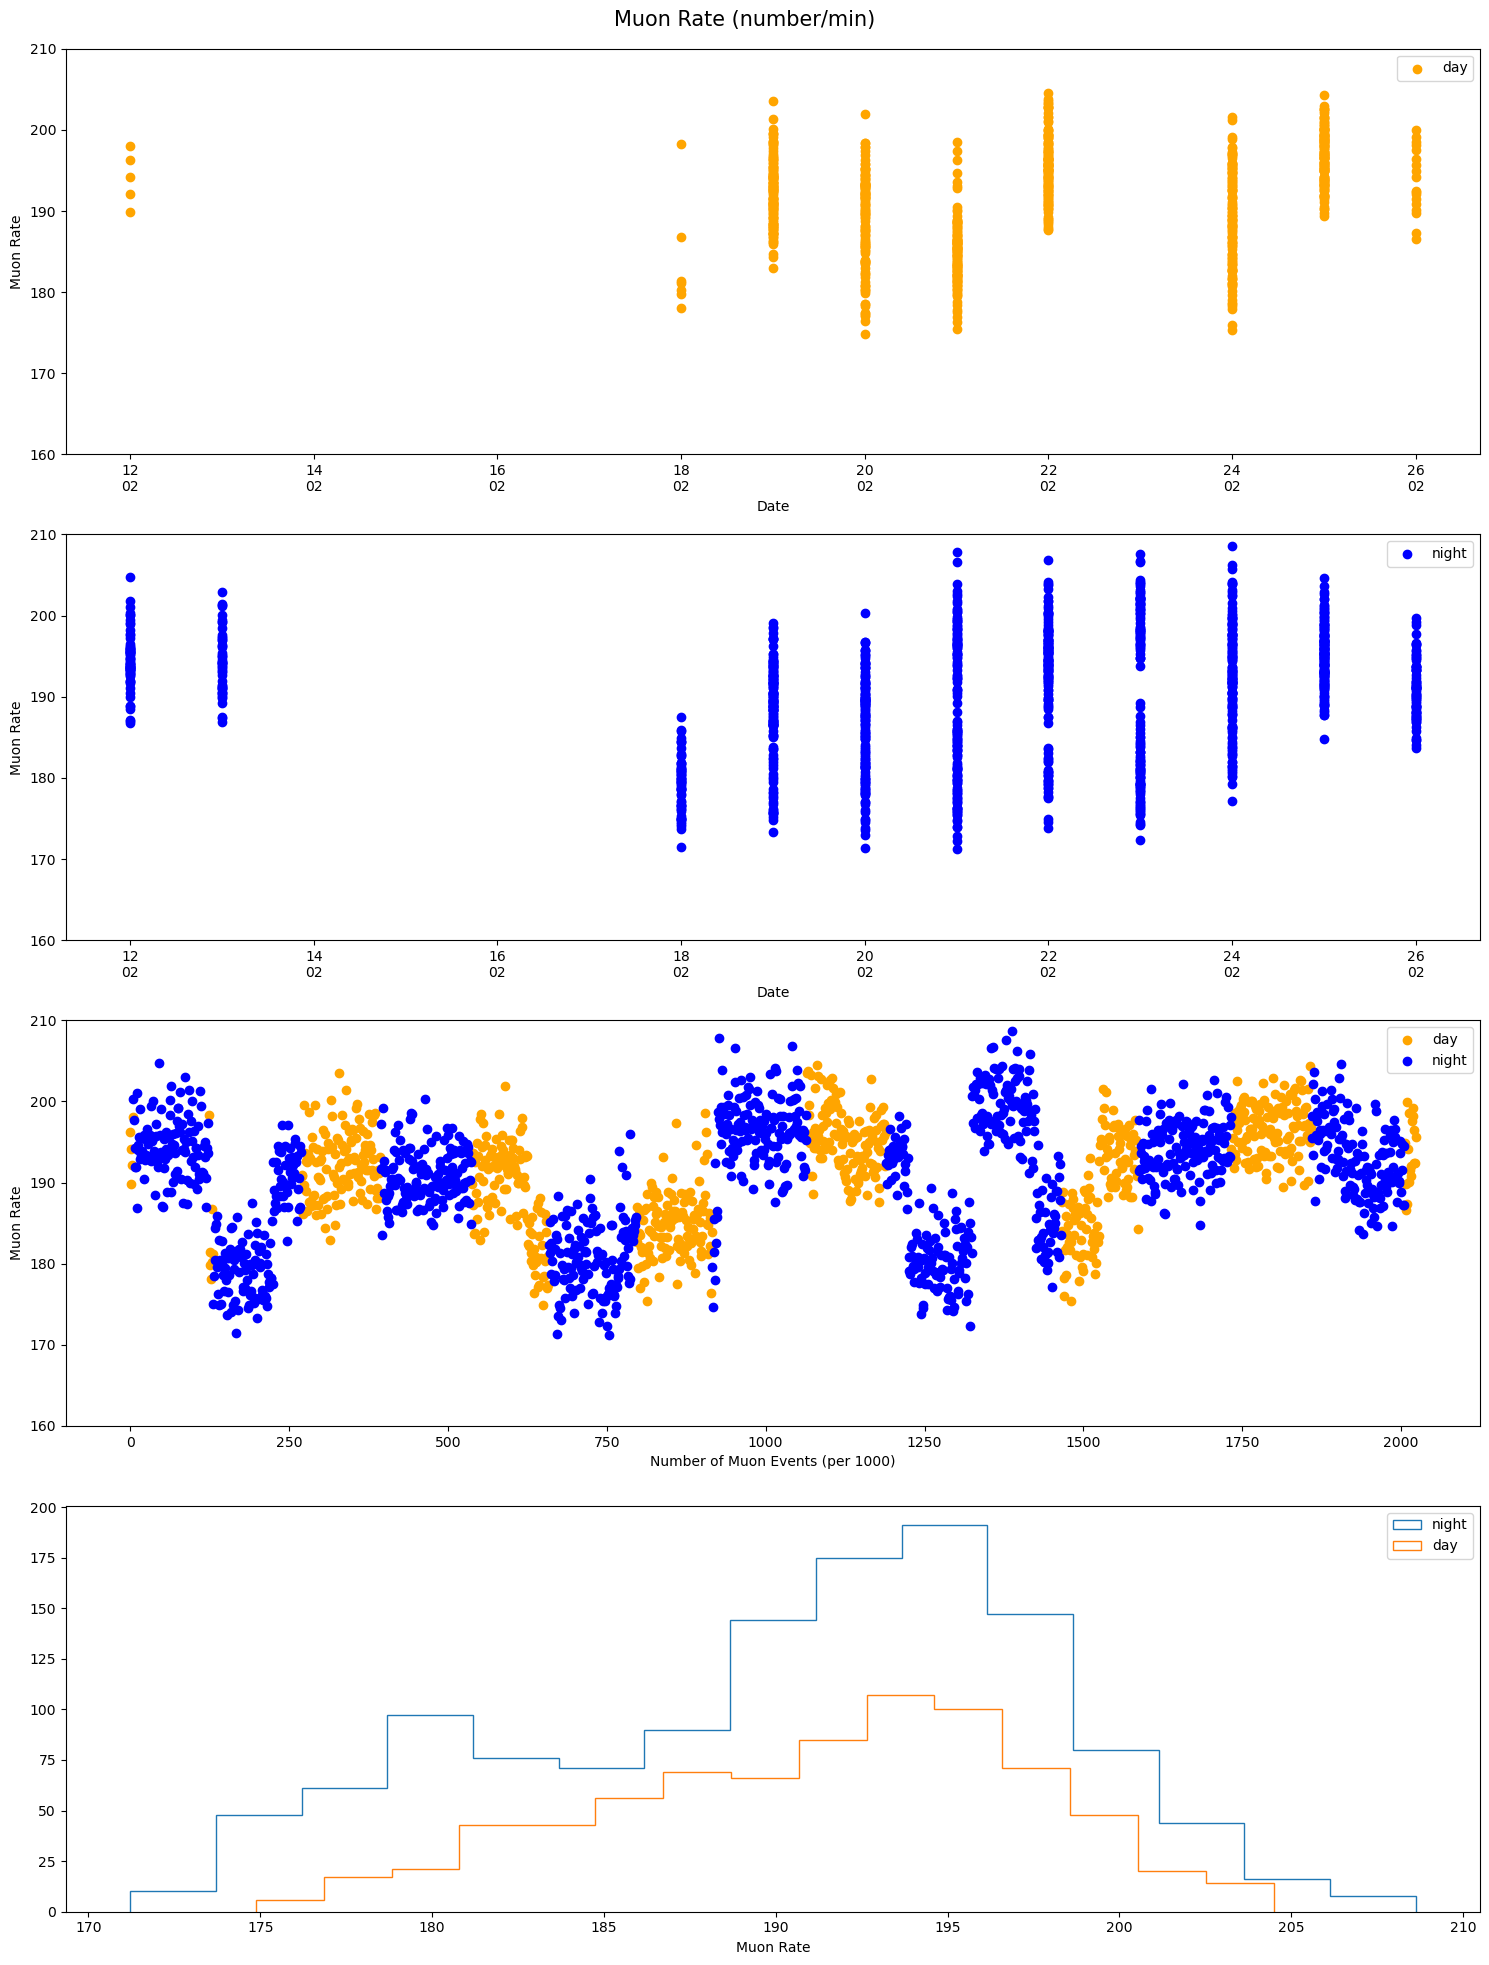

In [12]:
mdfo_calib.reload()    
getMuonRate(mdfo_calib,1000,save=True)